# 선형 판별 분석 실습

---

Linear Discriminant Analysis 는 데이터 포인트가 속하는 클래스를 구분하는 판별 함수가 선형 형태의 함수라는 뜻이다.

지도 학습적 접근 방식의 Dimension Reduction이다.

데이터 셋의 기존 공간으로 부터 **집단 간 분산과 집단 내 분산의 비율을 최대화** 하는 기존 공간보다 **더 작은 차원의 공간으로** 원래의 데이터를 투영시켜 차원 축소한다.

크게 (1) 집단 간의 거리를 계산 (between-class variance), (2) 각 집단의 평균과 각 데이터 포인트의 거리 계산 (within-class variance), (3) 기존 데이터 셋의 공간보다 더 작은 차원의 공간을 만드는 세 단계를 거친다. 

이 공간은 집단 간 분산을 최대화하고, 집단 내 분산을 최소화하는 공간이어야 한다.

- 새로운 데이터에 대한 예측은 변형된 공간에서의 각 집단별 평균을 구해 가장 가까운 집단으로 구분한다. 

- LDA에는 두 가지 방법이 존재한다.

        Class-Dependent LDA: 하나의 부분 공간은 각 집단으로 계산되는 방식
        (고윳갑 고유 벡터 또한 각 변환 행렬로 따로 구함. 따라서 각 집단 데이터 포인트는 각각에 대응하는 고유 벡터에 투영된다.)
        Class-Independent LDA: 클래스 구분 없이 모든 클래스에 대해 변환 행렬을 구함

- 기본 개념 자체는 PCA와 비슷하지만, PCA는 데이터 셋의 분산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는다.

- LDA에서 판별 함수는 선형이지만, 데이터의 집단을 판별하는 선이 항상 직선인 것은 아니다. LDA를 이용해서 곡선의 형태로 판별식을 그릴 수 있다. 그 방법이 더 높은 차원 공간으로 선형 변환한 후 확장된 공간에서 LDA를 하는 것이다.

- LDA에서는 집단별 공분한 행렬이 모두 동일하다는 가정을 하지만, QDA(Quadratic Discriminant Analysis)는 이 가정을 일반화시킨 방법으로 집단별 공분산 행렬이 같다는 가정이 존재하지 않는다. LDA, QDA는 파라미터 추정치의 분산이 작다는 장점이 존재하지만 bias가 존재한다는 단점이 있다.

> Whitening Transformation: 공분산 행렬이 단위 행렬이 되도록 기존 데이터를 변형하는 방법

> 단위 행렬의 대각 원소는 1이므로 이는 각 피처의 분산이 1이 된다는 말

> 단위 행렬의 나머지 원소응 0이므로 이는 각 변수 간 상관관계가 존재하지 않는 것을 의미한다.
    
> 그래서 선형 판별 분석은 $\mathbf a^T \boldsymbol{\Sigma}_W \mathbf a = 1 $ 이라는 제약 조건 하에  $\mathbf a^T \boldsymbol{\Sigma}_B \mathbf a $ 을 최대화 하는 벡터 $\mathbf a$를 찾는 것과 같다. ($\boldsymbol{\Sigma}_W$ 는 집단 내 분산 행렬)

##### 10.4.3 LDA 알고리즘을 활용하여 와인의 종류를 분류하는 모형을 만들어보자.


# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 데이터 셋 내 피처 살펴보기
raw_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 피처, 타깃 데이터 지정

In [3]:
X = raw_wine.data
y = raw_wine.target

## 트레이닝, 테스트 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)

## 데이터 표준화

In [5]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 std scaler fitting, Xtn Xte모두.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# LDA

LDA를 통해 학습을 시킨다. 

LinearDiscriminantAnalysis 의 옵션으로 n_components 를 통해 원하는 차원 설정이 가능하다.

default는 (클래스 개수-1, 피처 개수)의 최소값인데, 와인데이터의 클래스 수는 3, 피처는 13개로 min(3-1=2,13)=2로 자동으로 된다. 2차원으로 줄어드는데, n_components = 1하면 1차원 데이터로 줄어든다.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()    # LDA 모형 설정
lda.fit(X_tn_std, y_tn)               # 트레이닝 데이터를 넣고 적합

X_tn_lda = lda.transform(X_tn_std)  # 각각 차원축소 시킴
X_te_lda = lda.transform(X_te_std)

## 데이터 차원 축소 확인

In [7]:
# 원래의 데이터 크기

print(X_tn_std.shape)

(133, 13)


In [8]:
# 축소된 데이터 크기

print(X_tn_lda.shape)

(133, 2)


2차원으로차원 축소되어 133개의 데이터가 존재한다.

## LDA 상수항, 가중 벡터 확인

모형의 상수항과 가중 벡터를 확인해 볼 수 있다.

상수항은 클래스의 개수만큼 나온다.

가중벡터는 (클래스 개수* 피처 개수) 만큼 나오게 된다.

In [9]:
print(lda.intercept_)

[ -9.49063922  -3.6792656  -10.65310672]


In [10]:
print(lda.coef_)

[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


고유벡터가 바로 각 고윳값에 대응되는 고유 벡터로 이 고유 벡터가 바로 주성분 벡터이다.

차원축소 후 해당 성분의 설명되는 분산을 볼 차례인데 kpca는 제공하지 않는다. 

## LDA 적용 후 데이터 확인

데이터 프레임으로 바꾸는 이유는 데이터 시각화에 유리하기 때문이다. 그렇다.

In [11]:
# 해당 lda 데이터를 데이터 프레임으로 만들고 차원에 이름을 붙여준다.

lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda, columns = lda_columns)

# 그리고 타겟 데이터에 y_tn을 붙여준다.

X_tn_lda_df['target'] = y_tn
X_tn_lda_df.head(5)

,lda_comp1,lda_comp2,target
0,-2.563293,-0.503212,0
1,-0.646015,-2.169761,1
2,-3.981901,1.621584,0
3,-5.956216,3.878140,0
4,-4.047839,2.335699,0


## 라벨 미적용 LDA 데이터 시각화

라벨이 적용되기 전 나누어진 데이터들을 시각적으로 확인한다.

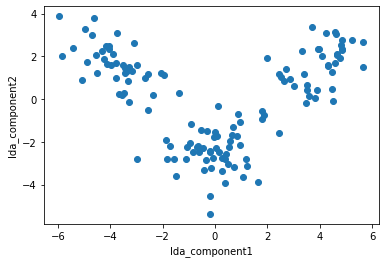

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_tn_lda_df['lda_comp1'], X_tn_lda_df['lda_comp2'], marker = 'o') # 각 피처를 요소에 넣고, 마커를 설정
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.show()

## 라벨 적용 PCA 데이터 시각화

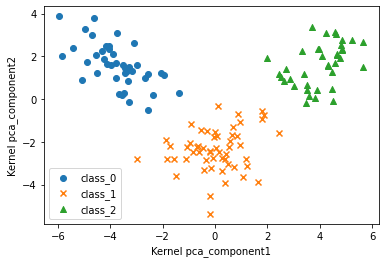

In [13]:
df = X_tn_lda_df
markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
    df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
    target_i = raw_wine.target_names[i]     # 클래스 저장
    X1 = df_i['lda_comp1']
    X2 = df_i['lda_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i)

plt.xlabel('Kernel pca_component1')
plt.ylabel('Kernel pca_component2')
plt.legend()                                               # 범례 추가하기
plt.show()

확실히 잘 나누어져 있는 것처럼 보인다. 다음은 정확도를 보도록 한다.

# LDA 적용 전후 데이터 예측 정확도 측정

## LDA 적용 이전 데이터 학습

비교를 위해 적용 전도 데이터 학습하여 예측하여 정확도를 보도록 해야겠다.

In [14]:
# 랜덤포레스트분류기 사용
from sklearn.ensemble import RandomForestClassifier

clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_std.fit(X_tn_std, y_tn)
pred_rf_std = clf_rf_std.predict(X_te_std)

### 적용 전 예측 정확도

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_std)

print(accuracy)

0.9777777777777777


## LDA 적용 이후 데이터 학습

In [16]:
# from sklearn.ensemble import RandomForestClassifier

clf_rf_lda = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)

### 적용 후 예측 정확도

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_lda)

print(accuracy)

1.0


정확도가 상승하다못해 1이 되어버렸다. 좋지않아,,,,,,,,,

# confusion matrix 비교

## LDA 전

In [18]:
# LDA 전

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_std)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


## LDA 후

In [19]:
# LDA 후

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_lda)
print(conf_matrix)

[[18  0  0]
 [ 0 17  0]
 [ 0  0 10]]


# report 비교

## LDA 전

In [20]:
# lda 전

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_std)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## LDA 후

In [21]:
# lda 후

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_lda)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Commentary

상당히 불편한 결과가 아닐 수는 없으나, 어찌되었든 데이터들을 정말 잘 분류할 수 있는 선형 분류 함수를 찾아 만들었다는 것은 정말 놀라울 따름이다.

차원 축소면 PCA 아니야? 라고만 생각했던 것과 다르게 지도 학습적 방법이 있다는 것은 좋은 것이라고 생각한다.

전체 데이터를 가지고 하는 것이기 때문에 (PCA처럼 고윳값 고유벡터 뽑고 선택적으로 이용하는게 아니어서?) 데이터를 얼마나 설명하는 지에 대한 것을 보지 않는게 맞는건가? 싶긴 한데, 문제는 차원이 출어들은 것이기 때문에 일부 피처는 무시된다는 것인데 그것에 대해서 **설명력을 설명할 수 있도록** 할 수 있는 방법이 있으면 좋겠다.

# 실험: n_composition = 3 으로 지정했을 때

n_components = 3로 돌리니 바로 에러가 생겼다.  바보같은 시도를 한 것이었다.

ValueError: n_components cannot be larger than min(n_features, n_classes - 1)

클래스가 3개이기 때문에 2개 이상으로 클 수 없다는 것이다.
```
n_components : int, default=None
    Number of components (<= min(n_classes - 1, n_features)) for
    dimensionality reduction. If None, will be set to
    min(n_classes - 1, n_features). This parameter only affects the
    `transform` method.
```

---

이번에는 solver를 아이겐으로 해볼까 한다. default = 'svd'이다. 

```
solver : {'svd', 'lsqr', 'eigen'}, default='svd'
    Solver to use, possible values:
      - 'svd': Singular value decomposition (default).
        Does not compute the covariance matrix, therefore this solver is
        recommended for data with a large number of features.
      - 'lsqr': Least squares solution.
        Can be combined with shrinkage or custom covariance estimator.
      - 'eigen': Eigenvalue decomposition.
        Can be combined with shrinkage or custom covariance estimator.
```


origin data volume: (133, 13)
after pca volume: (133, 2)
Bias(?) : [ -9.68249758  -3.74337099 -10.87003773]
Weight Vectors : [[ 2.1641846   0.34960415  1.64466034 -2.6884109  -0.03022561 -1.96902415
   5.56157521  0.30838124 -0.68263176 -2.13770621  0.54805318  3.13073463
   5.57902776]
 [-1.21447124 -0.99888395 -1.67891952  1.2237471   0.22625145  0.30375348
   1.16346151  0.44388371  0.34196434 -1.6117693   0.5784938  -0.1813972
  -2.402758  ]
 [-0.60921373  1.04226219  0.61133106  1.16164483 -0.28890336  1.69282374
  -7.65398697 -0.96350924  0.25057442  4.59688151 -1.41339068 -3.12012292
  -2.60503174]]


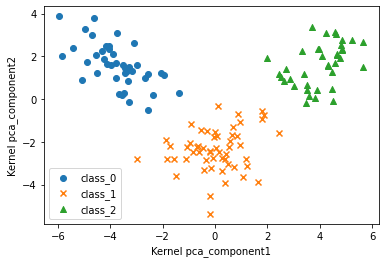

before lda accuracy: 0.9777777777777777
after lda accuracy: 1.0
[[18  0  0]
 [ 0 17  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
import pandas as pd
import numpy as np

# data import
from sklearn import datasets

raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target


# train/test data split
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)


# data standardization
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


# lda modeling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver = 'eigen')    # LDA 모형 설정
lda.fit(X_tn_std, y_tn)                               # 트레이닝 데이터를 넣고 적합

X_tn_lda = lda.transform(X_tn_std)                    # 각각 차원축소 시킴
X_te_lda = lda.transform(X_te_std)

# data checking
print('origin data volume:', X_tn_std.shape)
print('after pca volume:', X_tn_lda.shape)

# 상수항과 가중 벡터
print("Bias(?) : {}".format(lda.intercept_))
print("Weight Vectors : {}".format(lda.coef_))

# Visualization
df = X_tn_lda_df
markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
    df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
    target_i = raw_wine.target_names[i]     # 클래스 저장
    X1 = df_i['lda_comp1']
    X2 = df_i['lda_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i)

plt.xlabel('Kernel pca_component1')
plt.ylabel('Kernel pca_component2')
plt.legend()                                # 범례 추가하기
plt.show()

# before lda
from sklearn.ensemble import RandomForestClassifier
clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_std.fit(X_tn_std, y_tn)
pred_rf_std = clf_rf_std.predict(X_te_std)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_te, pred_rf_std)
print("before lda accuracy:", accuracy1)

# after lda
clf_rf_lda = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)

accuracy2 = accuracy_score(y_te, pred_rf_lda)
print("after lda accuracy:", accuracy2)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_lda)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_lda)
print(class_report)

 정확도나 다른 것이 크게 바뀌어보이지는 않는다.
 
 상수항도
 [ -9.49063922  -3.6792656  -10.65310672]

 [ -9.68249758  -3.74337099 -10.87003773]
  
아주 근소한 차이를 보이고 있다. 결과적으로도 크게 차이가 나지 않는다.

하지만... 왜 다른 차이를 보이는지 어떻게 차이가 날 수 있는지에 대해서는 더 공부하고 싶다.

추가적으로 LLE(Locally Linear Embedding)도 있는데, 개념을 훑어보니 K-means 클러스터링이 생각났다. 어떻게 다른지도 확실히 익히고 싶다.